## Definition
Regression problems are supervised learning problems in which the response is continuous. Classification problems are supervised learning problems in which the response is categorical. Poisson regression is one of the techniques that is useful for predicted problems.

In statistics, Poisson regression is a generalized linear model form of regression analysis used to model count data and contingency tables. Poisson regression assumes the response variable Y has a Poisson distribution, and assumes the logarithm of its expected value can be modeled by a linear combination of unknown parameters. 

It’s best used for rare events, as these tend to follow a Poisson distribution (as opposed to more common events which tend to be normally distributed). For example:

1.Number of colds contracted on airplanes.<br>
2.Number of bacteria found in a petri dish.<br>
3.Counts of catastrophic computer failures at a large tech firm in a calendar year.<br>
4.Number of 911 calls that end in the death of a suspect.<br>

For large means, the normal distribution is a good approximation for the Poisson distribution. Therefore, Poisson regression is more suited to cases where the response variable is a small integer.

Poisson regression is only used for numerical, continuous data. The same technique can be used for modeling categorical explanatory variables or counts in the cells of a contingency table. When used in this way, the models are called loglinear models.A Poisson regression model is sometimes known as a log-linear model, especially when used to model contingency tables.

In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [3]:
data = pd.read_csv('poisson_sim.csv')

print (' -----data head------')
print (data.head())
print('\n')
print ('-----data description------')
print (data.describe())

 -----data head------
    id  num_awards  prog  math
0   45           0     3    41
1  108           0     1    41
2   15           0     3    44
3   67           0     3    42
4  153           0     3    40


-----data description------
               id  num_awards        prog        math
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000    0.630000    2.025000   52.645000
std     57.879185    1.052921    0.690477    9.368448
min      1.000000    0.000000    1.000000   33.000000
25%     50.750000    0.000000    2.000000   45.000000
50%    100.500000    0.000000    2.000000   52.000000
75%    150.250000    1.000000    2.250000   59.000000
max    200.000000    6.000000    3.000000   75.000000


In [4]:
histData = []
uniqProgs = sorted(data['prog'].unique())
for elem in uniqProgs:
    histData.append(data[data['prog'] == elem]['num_awards'].values)

C:\Users\user\.conda\envs\DL\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


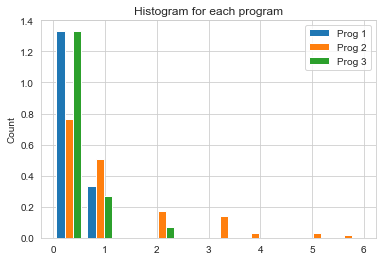

In [5]:
# plotting histogram in order to see
plt.hist(tuple(histData),bins=10, normed=True,histtype='bar',label= map(lambda x: 'Prog '+ str(x),uniqProgs))
plt.legend()
plt.ylabel('Count')
plt.title('Histogram for each program')
plt.show()

In [6]:
# adding dummy variables in order to handle categorical data in prog
prog_dummies = pd.get_dummies(data['prog']).rename(columns=lambda x: 'prog_' + str(x))
dataWithDummies = pd.concat([data, prog_dummies], axis=1)
dataWithDummies .drop(['prog', 'prog_3'], inplace=True, axis=1)
dataWithDummies = dataWithDummies .applymap(np.int)

print (dataWithDummies.head())


    id  num_awards  math  prog_1  prog_2
0   45           0    41       0       0
1  108           0    41       1       0
2   15           0    44       0       0
3   67           0    42       0       0
4  153           0    40       0       0


In [7]:
# applying poisson regression on data
# assuming variables are independent to each other
feat_cols = ['math', 'prog_1', 'prog_2']
X = [elem for elem in dataWithDummies[feat_cols].values]
# adding constant to adding bias
X = sm.add_constant(X, prepend=False)
Y = [elem for elem in dataWithDummies['num_awards'].values]

In [8]:
# building the model
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit(method="newton")
print(poisson_res.summary())


Optimization terminated successfully.
         Current function value: 0.913761
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Tue, 12 Nov 2019   Pseudo R-squ.:                  0.2118
Time:                        09:37:56   Log-Likelihood:                -182.75
converged:                       True   LL-Null:                       -231.86
Covariance Type:            nonrobust   LLR p-value:                 3.747e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0702      0.011      6.619      0.000       0.049       0.091
x2            -0.3698      0.

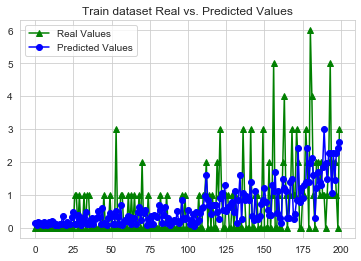

In [15]:
# testing the model
predVals = poisson_res.predict(X)
fi
plt.plot(range(len(Y)), Y, 'g-^', range(len(Y)), predVals, 'bo-')
plt.title('Train dataset Real vs. Predicted Values')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()